# Setting Up Workspace

In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import tweepy
import json
import matplotlib.pyplot as plt

# Gathering Data

In [2]:
# import Twitter archive data from CSV located in directory
ta_df = pd.read_csv('twitter_archive_enhanced.csv')

# import image predicitions data from Cloudfront URL
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
ip_df = pd.read_csv(StringIO(r.text), sep='\t')
ip_df.to_csv('image_predictions.tsv', sep='\t')

# import data captured via twitter API (see 'twitter_data_fetch.ipynb')
with open('tweet_json.txt') as tweet_json:
    tweet_data = json.load(tweet_json)
tj_df = pd.DataFrame().from_dict(tweet_data)[['id',
                                     'created_at', 
                                     'retweet_count',
                                     'favorite_count']]

# Assessing Data

In [3]:
ta_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`twitter archive` columns:
- **tweet_id**: the unique identifier for each tweet in the twitter archive file
- **in_reply_to_status_id**: if available, the unique id of the status the tweet was made in response to
- **in_reply_to_user_id**: if available, the unique id of the user the tweet was made in response to
- **timestamp**: the date and time of the creation of the tweet
- **source**: the source code of the tweet HTML
- **text**: the text of the body for the tweet
- **retweeted_status_id**: if available, the unique id of the tweet this tweet was made in response to
- **retweeted_status_user_id**: if available, the uqniue id of the user for the tweet this tweet was made in response to
- **retweet_status_timestamp**: if available, the timestamp (date and time) of the tweet this tweet was made in response to
- **rating_numerator**: the numerator of the score of the dog being rated (e.g., if the rating is '13/10', then this field is '13')
- **rating_denominator**: the denominator of the score of the dog being rated (e.g., if the rating is '13/10', then this field is '10')
- **name**: the name of the dog being rated
- **doggo**: whether or not the dog was described as a doggo
- **floofer**: whether or not the dog was described as a floofer
- **pupper**: whether or not the dog was described as a pupper
- **puppo**: whether or not the dog was described as a puppo

In [4]:
ip_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


`image predictions` columns
- **tweet_id**: the unique identification of the tweet from which the image in the image predictions file is associated with
- **jpg_url**: the URL for the image being analyzed
- **img_num**: the number of the image in the tweet
- **p1**: the algorithms number one prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its number one prediction
- **p1_dog**: whether or not the number one prediction is a breed of dog
- **p2**: the algorithms number two prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its number two prediction
- **p2_dog**: whether or not the number two prediction is a breed of dog
- **p3**: the algorithms number three prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its number three prediction
- **p3_dog**: whether or not the number three prediction is a breed of dog

In [5]:
tj_df

,id,created_at,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8807,39410
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6456,33739
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4281,25408
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8890,42777
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9687,40936
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,3226,20519
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,2133,12035
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,19496,66587
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,4378,28156
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,7654,32405


`tweet json` columns
- **id**: the unique identification of the tweet
- **created_at**: the datetime (time and date) at which the tweet was created
- **retweet_count**: the number of times the tweet was retweeted
- **favorite_count**: the number of times the tweet was favorited ('liked')

In [6]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
id                2351 non-null int64
created_at        2351 non-null object
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.5+ KB


In [9]:
all_columns = pd.Series(list(ta_df) + list(ip_df) + list(tj_df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [10]:
ta_df[ta_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [11]:
dog_type_sum = sum([ta_df.doggo != 'None']) + sum([ta_df.floofer != 'None']) + sum([ta_df.pupper != 'None']) + sum([ta_df.puppo != 'None'])

In [12]:
dog_type_sum.value_counts()

0    1976
1     366
2      14
dtype: int64

In [13]:
ta_df[dog_type_sum > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [14]:
ta_df[dog_type_sum > 1].iloc[0].text

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [15]:
ta_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
for text in ta_df[ta_df.name == 'quite'].text:
    print("-" + text)

-RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
-We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
-Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
-This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t


In [17]:
ta_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
ta_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
print(ta_df[ta_df['rating_denominator'] == 2].tweet_id)
ta_df[ta_df['rating_denominator'] == 2].iloc[0].text

2335    666287406224695296
Name: tweet_id, dtype: int64


'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [20]:
pd.to_datetime(ta_df.timestamp).describe()

count                    2356
unique                   2356
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

In [21]:
ip_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
ip_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [23]:
ip_df[ip_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [24]:
ip_df[ip_df.jpg_url == 'https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1566,793962221541933056,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True


In [25]:
ip_df[ip_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
tj_df.describe()

,id,retweet_count,favorite_count
count,2.351000e+03,2351.000000,2351.000000
mean,7.425660e+17,3128.246278,8107.763505
std,6.846560e+16,5233.752089,11982.952590
min,6.660209e+17,0.000000,0.000000
25%,6.783929e+17,617.000000,1417.000000
50%,7.193395e+17,1451.000000,3590.000000
75%,7.989987e+17,3619.500000,10110.000000
max,8.924206e+17,78950.000000,132082.000000


In [27]:
print(max(ta_df['timestamp']))
print(min(ta_df['timestamp']))
print(sum(ta_df['timestamp'].duplicated()))

2017-08-01 16:23:56 +0000
2015-11-15 22:32:08 +0000
0


# Cleaning Data

#### Quality
##### `twitter archive` table
- tweet `855851453814013952` marked as both a `puppo` and a `doggo`; should just be a `puppo`
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` are floats when they should be strings
- `timestamp` and `retweeted_status_timestamp` are strings and should be datetimes
- `tweet_id` is interpreted as integers and should be strings
- multiple tweets have the name `quite`, none of these have names
- tweet `666287406224695296` has the numerator `1`, should be `9`
- tweet `666287406224695296` has the denominator `2`, should be `10`
- some tweets are retweets and need to be removed
- `rating_numerator` and `rating_denominator` are integers and should be floats

##### `image predictions` table
- `tweet_id` is interpreted as integers and should be strings

##### `tweet json` table
- `created_at` is interpreted as strings and should be datetimes
- `id` is interpreted as integers and should be strings


#### Tidiness
##### `twitter archive` table
- `doggo`, `floofer`, `pupper`, and `puppo` are one varible in four columns
- `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` form a different observational unit
- `in_reply_to_status_id` and `in_reply_to_user_id` form a different observational unit

##### `tweet json` table
- `created_at` is duplicated in the `tweet archive` table

# Clean

In [28]:
ta_df_clean = ta_df.copy()
ip_df_clean = ip_df.copy()
tj_df_clean = tj_df.copy()

#### tweet `855851453814013952` marked as both a `puppo` and a `doggo`; should just be a `puppo`

##### Define

Mark the `doggo` column as `None` for this tweet

##### Code

In [29]:
for i in ta_df_clean[ta_df_clean.tweet_id == 855851453814013952].index:
    ta_df_clean.loc[i,'doggo'] = 'None'

##### Test

In [30]:
for i in ta_df_clean[ta_df_clean.tweet_id == 855851453814013952].index:
    print(ta_df_clean.loc[i])

tweet_id                                                     855851453814013952
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-22 18:31:02 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a puppo participating in the #ScienceMa...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/855851453...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

#### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are floats when they should be strings

##### Define

Convert the floats into strings.  We map the floats to strings while formatting them so they are not in scientific notation.  Then we replace the string 'nan' with np.nan for easier calculations.  We do this for each column.

##### Code

In [31]:
for label in ['in_reply_to_status_id', 
              'in_reply_to_user_id', 
              'retweeted_status_id', 
              'retweeted_status_user_id']:
    ta_df_clean[label] = ta_df_clean[label].map(lambda x: '{:.0f}'.format(x))
    ta_df_clean[label] = ta_df_clean[label].replace('nan', np.nan)

##### Test

In [32]:
for label in ['in_reply_to_status_id', 
              'in_reply_to_user_id', 
              'retweeted_status_id', 
              'retweeted_status_user_id']:
    print(ta_df_clean[label][~ta_df_clean[label].isnull()].head())

30     886266357075128320
55     881607037314052096
64     879553827334172672
113    870726202742493184
148    863425645568774144
Name: in_reply_to_status_id, dtype: object
30     2281181600
55       47384430
64     3105440746
113      16487760
148      77596200
Name: in_reply_to_user_id, dtype: object
19    887473957103951872
32    886053734421102592
36    830583320585068544
68    878057613040115712
73    878281511006478336
Name: retweeted_status_id, dtype: object
19    4196983835
32      19607400
36    4196983835
68    4196983835
73    4196983835
Name: retweeted_status_user_id, dtype: object


#### timestamp and retweeted_status_timestamp are strings and should be datetimes

##### Define

Convert the object columns to datetime columns

##### Code

In [33]:
ta_df_clean.timestamp = pd.to_datetime(ta_df_clean.timestamp)
ta_df_clean.retweeted_status_timestamp = pd.to_datetime(ta_df_clean.retweeted_status_timestamp)

##### Test

In [34]:
print(ta_df_clean.info())
print(ta_df_clean.head()[['timestamp','retweeted_status_timestamp']])
print(ta_df_clean[~ta_df_clean['retweeted_status_timestamp'].isnull()].head()[['timestamp','retweeted_status_timestamp']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

#### `tweet_id` is interpreted as integers and should be strings

##### Define

Convert the column to objects

##### Code

In [35]:
ta_df_clean.tweet_id = ta_df_clean.tweet_id.astype(str)
ip_df_clean.tweet_id = ip_df_clean.tweet_id.astype(str)

##### Test

In [36]:
print(ta_df_clean.info())
print(ta_df_clean.tweet_id.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [37]:
print(ip_df_clean.info())
print(ip_df_clean.tweet_id.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB
None
0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object


#### multiple tweets have the name `quite`, none of these have names

##### Define

Change the name of the dog from 'quite' to None

###### Code

In [38]:
for i in ta_df_clean[ta_df_clean.name == 'quite'].index:
    ta_df_clean.loc[i,'name'] = None

###### Test

In [39]:
ta_df_clean[ta_df_clean.name == 'quite']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### tweet `666287406224695296` has the numerator `1`, should be `9`

###### Define

Change `rating_numerator` of the tweet to `9`

###### Code

In [40]:
for i in ta_df_clean[ta_df_clean.tweet_id == '666287406224695296'].index:
    ta_df_clean.loc[i,'rating_numerator'] = 9

###### Test

In [41]:
ta_df_clean[ta_df_clean.tweet_id == '666287406224695296']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,9,2,an,None,None,None,None


#### tweet `666287406224695296` has the denominator `2`, should be `10`

###### Define

Change `rating_denominator` of the tweet to `10`

###### Code

In [42]:
for i in ta_df_clean[ta_df_clean.tweet_id == '666287406224695296'].index:
    ta_df_clean.loc[i,'rating_denominator'] = 10

###### Test

In [43]:
ta_df_clean[ta_df_clean.tweet_id == '666287406224695296']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


#### some tweets are retweets and need to be removed

###### Define

Remove all observations that are retweets, i.e., that have a non-null value for `retweeted_status_id`

###### Code

In [44]:
ta_df_clean = ta_df_clean[ta_df_clean['retweeted_status_id'].isnull()]

###### Test

In [45]:
ta_df_clean[~ta_df_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### rating_numerator and rating_denominator are integers and should be floats

###### Define

Convert the column type from integer to float

###### Code

In [46]:
ta_df_clean.rating_numerator = ta_df_clean.rating_numerator.astype(float)
ta_df_clean.rating_denominator = ta_df_clean.rating_denominator.astype(float)

###### Test

In [47]:
ta_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2172 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns

#### created_at is interpreted as strings and should be datetimes

###### Define

Convert the object columns to datetime columns

###### Define

In [48]:
tj_df_clean.created_at = pd.to_datetime(tj_df_clean.created_at)

###### Test

In [49]:
tj_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
id                2351 non-null int64
created_at        2351 non-null datetime64[ns]
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.5 KB


#### `id` is interpreted as integers and should be strings

###### Define

Convert the column to objects

###### Code

In [50]:
tj_df_clean.id = tj_df_clean.id.astype(str)

###### Test

In [51]:
tj_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
id                2351 non-null object
created_at        2351 non-null datetime64[ns]
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 73.5+ KB


#### `doggo`, `floofer`, `pupper`, and `puppo` are one varible in four columns

###### Define

We convert these four columns into one categoriacal column

###### Code

In [52]:
ta_df_clean['dog_type'] = None
for index, row in ta_df_clean.iterrows():
    d1 = row.doggo != 'None'
    d2 = row.floofer != 'None'
    d3 = row.pupper != 'None'
    d4 = row.puppo != 'None'
    dt = d1 + d2 + d3 + d4
    if (dt == 0):
        # No dog type indicated
        continue
    if (dt > 1):
        # Multiple dog types
        ta_df_clean.loc[index, 'dog_type'] = 'multiple'
        continue
    if d1:
        ta_df_clean.loc[index, 'dog_type'] = 'doggo'
    if d2:
        ta_df_clean.loc[index, 'dog_type'] = 'floofer'
    if d3:
        ta_df_clean.loc[index, 'dog_type'] = 'pupper'
    if d4:
        ta_df_clean.loc[index, 'dog_type'] = 'puppo'
        
ta_df_clean = ta_df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

###### Test

In [53]:
print(ta_df_clean['dog_type'].value_counts())

pupper      224
doggo        75
puppo        25
multiple     11
floofer       9
Name: dog_type, dtype: int64


#### `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` form a different observational unit

###### Define

In the case of this analysis, we are only interested in whether or not a tweet in the archive is a retweet or not.  So we replace these columns with a boolean indicating whether or not the tweet is a retweet.

###### Code

In [54]:
ta_df_clean['retweet'] = ~ta_df_clean.retweeted_status_id.isnull()
ta_df_clean = ta_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [55]:
print(ta_df_clean['retweet'].value_counts())

False    2175
Name: retweet, dtype: int64


#### `in_reply_to_status_id` and `in_reply_to_user_id` form a different observational unit

###### Define

Similar to the case above, we won't be using the specific reply data.  Instead we're interested in whether or not the tweet is a reply, so we consolidate our data accordingly.

###### Code

In [56]:
ta_df_clean['reply'] = ~ta_df_clean.in_reply_to_status_id.isnull()
ta_df_clean = ta_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

###### Test

In [57]:
print(ta_df_clean['reply'].value_counts())

False    2097
True       78
Name: reply, dtype: int64


#### `created_at` is duplicated in the `tweet archive` table

###### Define

The `created_at` column in the `tweet json` table is the same value as the `timestamp` column in the `tweet archive` table, so we remove it.

###### Code

In [58]:
tj_df_clean = tj_df_clean.drop('created_at', axis=1)

###### Test

In [59]:
tj_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
id                2351 non-null object
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


# Storing

Now we merge our datasets and store them in a master csv file.

In [60]:
master_df = ta_df_clean.merge(ip_df_clean, on='tweet_id')
master_df = master_df.merge(tj_df_clean, left_on = 'tweet_id', right_on = 'id')

In [61]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1991 non-null object
dog_type              306 non-null object
retweet               1994 non-null bool
reply                 1994 non-null bool
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-

In [62]:
master_df.to_csv('twitter_archive_master.csv')

# Analyzing

In [63]:
dogs = master_df[master_df.p1_dog]
dogs = dogs[dogs.rating_denominator == 10]

In [64]:
dogs.rating_numerator.describe()

count    1463.000000
mean       10.987013
std         2.451549
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

In [65]:
low = .01
high = .99
quant = dogs.rating_numerator.quantile([low, high])
dogs = dogs[dogs.rating_numerator >= quant[low]]
dogs = dogs[dogs.rating_numerator <= quant[high]]

In [66]:
dogs.rating_numerator.describe()

count    1452.000000
mean       10.963499
std         1.605269
min         5.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [67]:
dogs.p1.value_counts()

golden_retriever               135
Labrador_retriever              92
Pembroke                        87
Chihuahua                       78
pug                             53
chow                            41
Samoyed                         40
toy_poodle                      38
Pomeranian                      37
malamute                        29
cocker_spaniel                  27
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              22
German_shepherd                 20
Siberian_husky                  19
Staffordshire_bullterrier       19
Eskimo_dog                      18
Shetland_sheepdog               18
beagle                          17
Rottweiler                      17
Shih-Tzu                        17
Cardigan                        17
Maltese_dog                     17
Italian_greyhound               16
Lakeland_terrier                16
kuvasz                          15
basset                          13
vizsla              

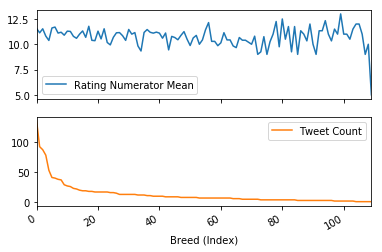

In [68]:
dog_means = []
for breed in dogs.p1.value_counts().index:
    breed_tweets = dogs[dogs.p1 == breed]
    data = {'breed': breed, 
            'Rating Numerator Mean': breed_tweets.rating_numerator.mean(),
           'Tweet Count': len(breed_tweets)}
    dog_means.append(data)
    
dog_mean_df = pd.DataFrame(dog_means)
dog_mean_df.plot(subplots=True)
plt.xlabel("Breed (Index)")
plt.show()

In [69]:
print(dog_mean_df.head(10))

   Rating Numerator Mean  Tweet Count               breed
0              11.562963          135    golden_retriever
1              11.130435           92  Labrador_retriever
2              11.528736           87            Pembroke
3              10.807692           78           Chihuahua
4              10.377358           53                 pug
5              11.609756           41                chow
6              11.700000           40             Samoyed
7              11.105263           38          toy_poodle
8              11.189189           37          Pomeranian
9              10.896552           29            malamute


In [70]:
print(dog_mean_df.sort_values('Rating Numerator Mean', ascending=False).head(10))

     Rating Numerator Mean  Tweet Count               breed
99               13.000000            2        Afghan_hound
80               12.500000            4              Saluki
94               12.333333            3              briard
78               12.250000            4     Tibetan_mastiff
56               12.142857            7      Border_terrier
105              12.000000            1       silky_terrier
104              12.000000            1  standard_schnauzer
89               12.000000            3     giant_schnauzer
17               11.777778           18          Eskimo_dog
82               11.750000            4        Irish_setter


In [71]:
print(dog_mean_df[dog_mean_df['Tweet Count'] > 10].sort_values('Rating Numerator Mean', ascending=False).head(10))

    Rating Numerator Mean  Tweet Count             breed
17              11.777778           18        Eskimo_dog
6               11.700000           40           Samoyed
5               11.609756           41              chow
0               11.562963          135  golden_retriever
22              11.529412           17          Cardigan
2               11.528736           87          Pembroke
30              11.461538           13    Great_Pyrenees
36              11.454545           11            kelpie
15              11.315789           19    Siberian_husky
10              11.296296           27    cocker_spaniel


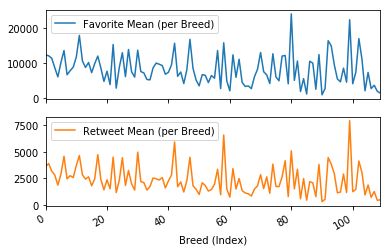

In [72]:
dog_social = []
for breed in dogs.p1.value_counts().index:
    breed_tweets = dogs[dogs.p1 == breed]
    data = {'breed': breed, 
            'Retweet Mean (per Breed)': breed_tweets.retweet_count.mean(),
            'Favorite Mean (per Breed)': breed_tweets.favorite_count.mean()}
    dog_social.append(data)
    
dog_social_df = pd.DataFrame(dog_social)
dog_social_df.plot(subplots=True)
plt.xlabel("Breed (Index)")
plt.show()

In [73]:
print(dog_social_df.sort_values('Retweet Mean (per Breed)', ascending=False).head(10))

    Favorite Mean (per Breed)  Retweet Mean (per Breed)                  breed
99               22296.000000               7942.500000           Afghan_hound
58               15711.142857               6588.142857        standard_poodle
42               15597.555556               5933.222222       English_springer
80               23956.250000               5092.000000                 Saluki
30               13602.769231               4972.923077         Great_Pyrenees
17               11932.500000               4729.500000             Eskimo_dog
11               17827.769231               4644.269231         French_bulldog
6                13508.900000               4584.400000                Samoyed
22               15224.411765               4501.647059               Cardigan
47               16702.875000               4490.250000  flat-coated_retriever


In [74]:
print(dog_social_df.sort_values('Favorite Mean (per Breed)', ascending=False).head(10))

     Favorite Mean (per Breed)  Retweet Mean (per Breed)  \
80                23956.250000               5092.000000   
99                22296.000000               7942.500000   
11                17827.769231               4644.269231   
102               16917.000000               4129.500000   
47                16702.875000               4490.250000   
92                16312.000000               4464.000000   
58                15711.142857               6588.142857   
42                15597.555556               5933.222222   
22                15224.411765               4501.647059   
93                14840.666667               3832.000000   

                       breed  
80                    Saluki  
99              Afghan_hound  
11            French_bulldog  
102  black-and-tan_coonhound  
47     flat-coated_retriever  
92       Irish_water_spaniel  
58           standard_poodle  
42          English_springer  
22                  Cardigan  
93                  Leonberg 

In [75]:
#from https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot

def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

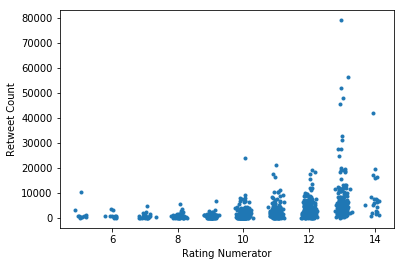

In [76]:
plt.plot(rand_jitter(dogs.rating_numerator), dogs.retweet_count, '.')
plt.xlabel("Rating Numerator")
plt.ylabel("Retweet Count")
plt.show()

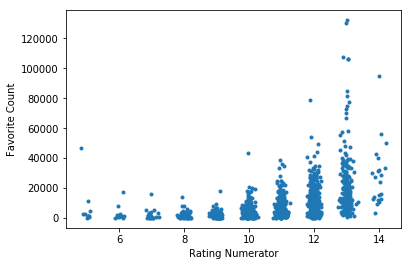

In [77]:
plt.plot(rand_jitter(dogs.rating_numerator), dogs.favorite_count, '.')
plt.xlabel("Rating Numerator")
plt.ylabel("Favorite Count")
plt.show()

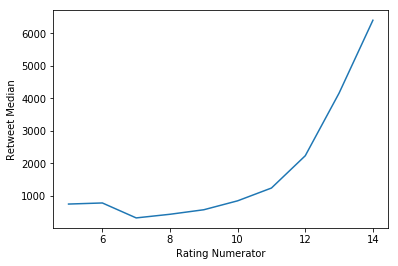

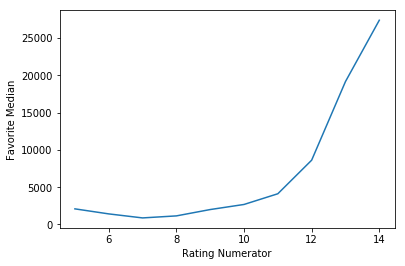

In [78]:
dog_rating_retweet = []
for rating in dogs.rating_numerator.value_counts().index:
    tweet_rating = dogs[dogs.rating_numerator == rating]
    data = {'Rating': rating, 
            'Retweet Median': tweet_rating.retweet_count.median(),
            'Favorite Median': tweet_rating.favorite_count.median()}
    dog_rating_retweet.append(data)
    
dog_rating_retweet_df = pd.DataFrame(dog_rating_retweet)
dog_rating_retweet_df = dog_rating_retweet_df.sort_values('Rating')

plt.plot(dog_rating_retweet_df['Rating'], dog_rating_retweet_df['Retweet Median'])
plt.xlabel("Rating Numerator")
plt.ylabel("Retweet Median")
plt.show()

plt.plot(dog_rating_retweet_df['Rating'], dog_rating_retweet_df['Favorite Median'])
plt.xlabel("Rating Numerator")
plt.ylabel("Favorite Median")
plt.show()

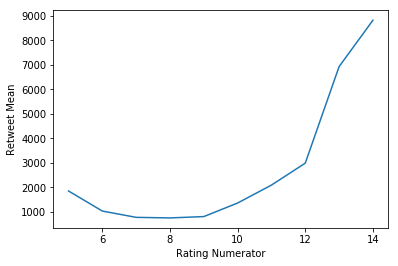

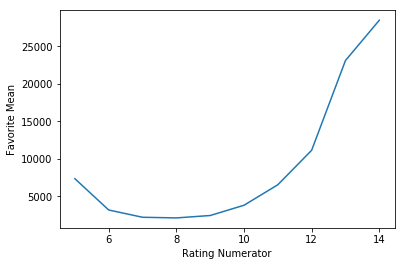

In [79]:
dog_rating_retweet = []
for rating in dogs.rating_numerator.value_counts().index:
    tweet_rating = dogs[dogs.rating_numerator == rating]
    data = {'Rating': rating, 
            'Retweet Mean': tweet_rating.retweet_count.mean(),
            'Favorite Mean': tweet_rating.favorite_count.mean()}
    dog_rating_retweet.append(data)
    
dog_rating_retweet_df = pd.DataFrame(dog_rating_retweet)
dog_rating_retweet_df = dog_rating_retweet_df.sort_values('Rating')

plt.plot(dog_rating_retweet_df['Rating'], dog_rating_retweet_df['Retweet Mean'])
plt.xlabel("Rating Numerator")
plt.ylabel("Retweet Mean")
plt.show()

plt.plot(dog_rating_retweet_df['Rating'], dog_rating_retweet_df['Favorite Mean'])
plt.xlabel("Rating Numerator")
plt.ylabel("Favorite Mean")
plt.show()